## Student Performance Indicator

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
df.shape

(1000, 8)

##### Understanding Dataset

In [36]:
# gender : Male Female 
# race_ethnicity : group A,B,C,D,E 
# parental_level_education : 6 cat
# lunch : standard free/reduced
# test_prep_course : none completed
# math_score,reading_score,writting_score

In [37]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

##### Missing values

In [38]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Duplicate values

In [39]:
df.duplicated().sum()

0

##### Datatype EDA

In [40]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [41]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [42]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

In [43]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [44]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [45]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = round(df['total_score'] / 3,2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [46]:
df['math_score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

In [47]:
iqr = df['math_score'].quantile(0.75) - df['math_score'].quantile(0.25)
lower_bound = df['math_score'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['math_score'].quantile(0.75) + (1.5 * iqr)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

Lower Bound: 27.0
Upper Bound: 107.0


<Axes: >

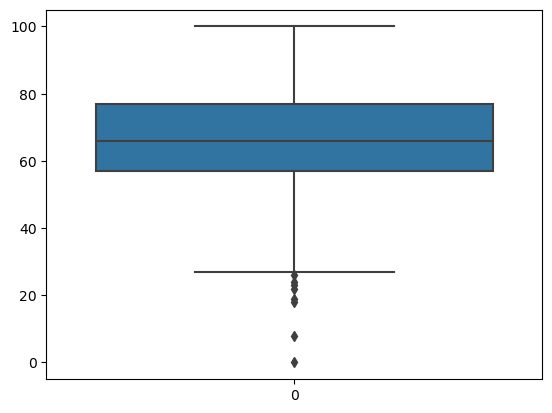

In [49]:
sns.boxplot(df['math_score'])

In [51]:
math_less_than_27 = df[df['math_score'] < 27]
math_less_than_27

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.00
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00
145,female,group C,some college,free/reduced,none,22,39,33,94,31.33
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.67
466,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.67
787,female,group B,some college,standard,none,19,38,32,89,29.67
842,female,group B,high school,free/reduced,completed,23,44,36,103,34.33
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33


In [52]:
iqr = df['reading_score'].quantile(0.75) - df['reading_score'].quantile(0.25)
lower_bound = df['reading_score'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['reading_score'].quantile(0.75) + (1.5 * iqr)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

Lower Bound: 29.0
Upper Bound: 109.0


In [53]:
df['reading_score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

<Axes: >

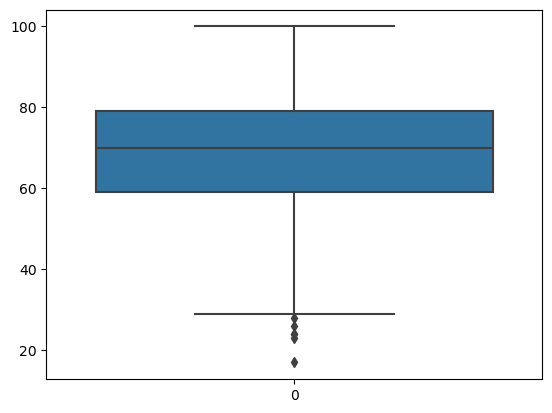

In [54]:
sns.boxplot(df['reading_score'])

In [56]:
reading_less_than_29 = df[df['reading_score'] < 29]
reading_less_than_29

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00
76,male,group E,some high school,standard,none,30,26,22,78,26.00
211,male,group C,some college,free/reduced,none,35,28,27,90,30.00
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33


In [57]:
iqr = df['writing_score'].quantile(0.75) - df['writing_score'].quantile(0.25)
lower_bound = df['writing_score'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['writing_score'].quantile(0.75) + (1.5 * iqr)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

Lower Bound: 25.875
Upper Bound: 110.875


In [58]:
df['writing_score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64

<Axes: >

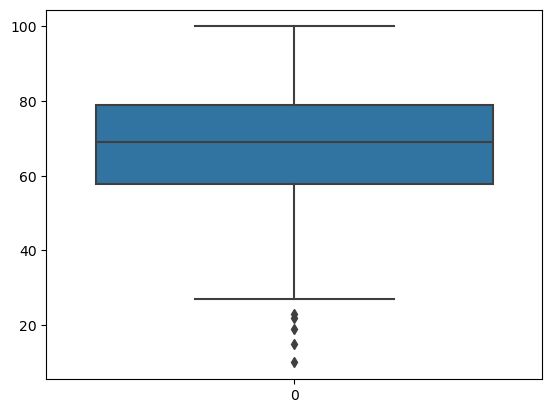

In [59]:
sns.boxplot(df['writing_score'])

In [60]:
writing_less_than_25 = df[df['writing_score'] < 25]
writing_less_than_25

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00
76,male,group E,some high school,standard,none,30,26,22,78,26.00
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33


In [64]:
failed_in_all_subjects = df[(df['math_score']<30) & (df['reading_score']<30) & (df['writing_score']<30)]

In [65]:
failed_in_all_subjects

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33


In [66]:
math_less_than_30 = df[df['math_score'] < 30]
reading_less_than_30 = df[df['reading_score'] < 30]
writing_less_than_30 = df[df['writing_score'] < 30]
print("No of students failed in math:", math_less_than_30.shape[0])
print("No of students failed in reading:", reading_less_than_30.shape[0])
print("No of students failed in writing:", writing_less_than_30.shape[0])

No of students failed in math: 14
No of students failed in reading: 8
No of students failed in writing: 9


In [67]:
## 3 students failed in all subjects
## 14 students failed in math
## 8 students failed in reading
## 9 students failed in writing

<Axes: xlabel='math_score', ylabel='Count'>

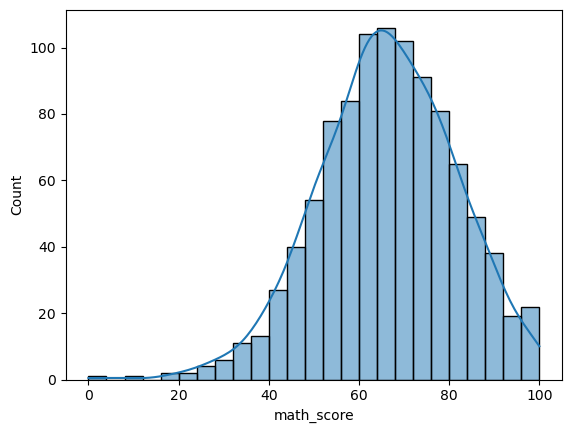

In [73]:
# distribution of math score
sns.histplot(df['math_score'], kde=True)

<Axes: xlabel='reading_score', ylabel='Count'>

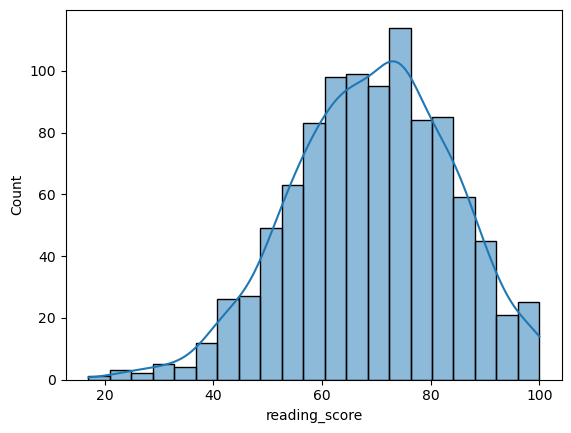

In [74]:
# distribution of reading score
sns.histplot(df['reading_score'], kde=True)

<Axes: xlabel='writing_score', ylabel='Count'>

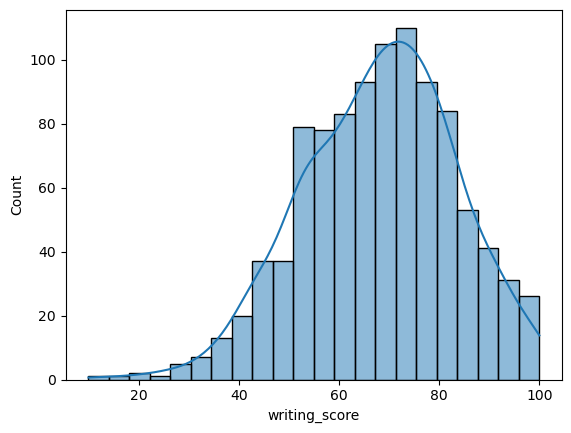

In [75]:
# distribution of writing score
sns.histplot(df['writing_score'], kde=True)

<Axes: xlabel='total_score', ylabel='Count'>

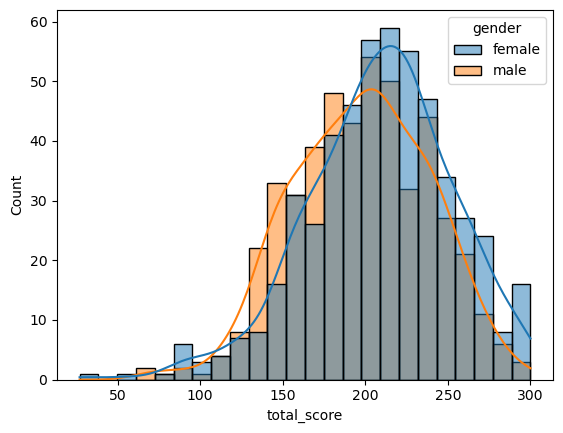

In [77]:
sns.histplot(data=df, x='total_score', hue='gender',kde=True)

In [89]:
pivot_tab = df.groupby('gender')[['total_score','average_score']].mean()
pivot_tab.reset_index(inplace=True)
pivot_tab.columns = ['gender','mean_total_score','mean_average_score']
pivot_tab

,gender,mean_total_score,mean_average_score
0,female,208.708494,69.569498
1,male,197.512448,65.837303


In [93]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

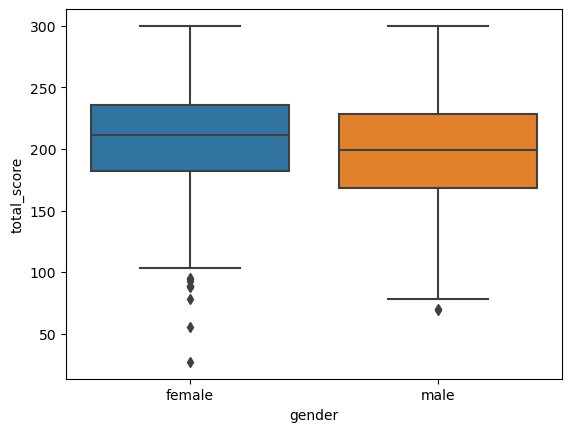

In [98]:
sns.boxplot(data=df, x='gender', y='total_score')
plt.show()

<Axes: xlabel='average_score', ylabel='Count'>

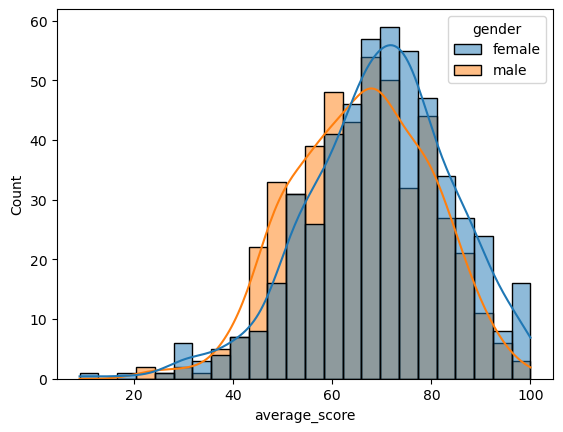

In [78]:
sns.histplot(data=df, x='average_score', hue='gender',kde=True)